
Top 10 Countries by User Count:
country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Canada             58600
Netherlands        52367
Czechia            48122
Japan              46553
Switzerland        38093
Name: count, dtype: int64


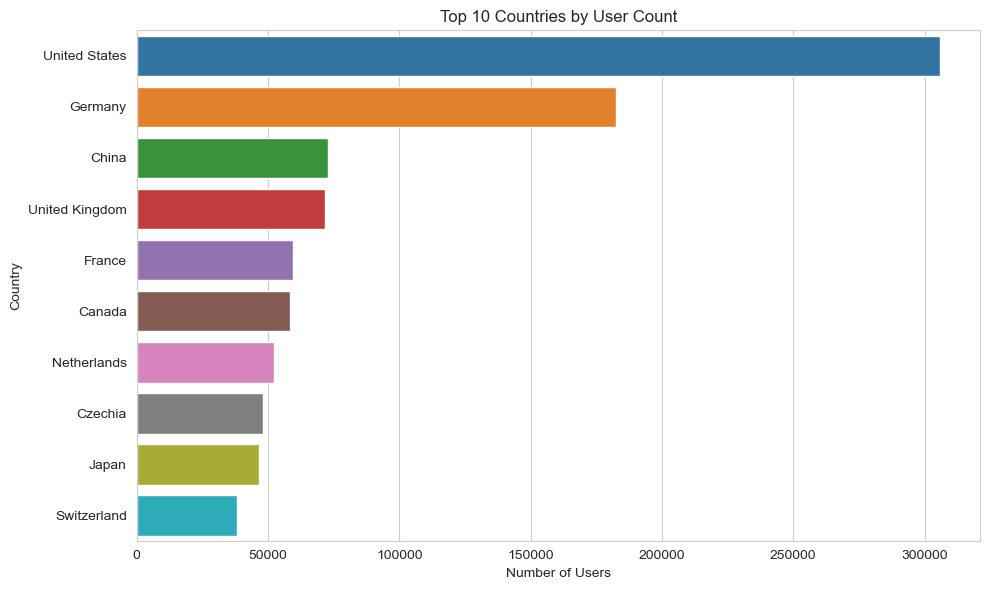


Top 10 Cities by User Count:
city
Palo Alto        19215
Paris            16021
Houston          15449
Edinburgh        15308
Berlin           15095
Tokyo            14877
Montreal         13171
London           12546
New York         11441
San Francisco    11271
Name: count, dtype: int64


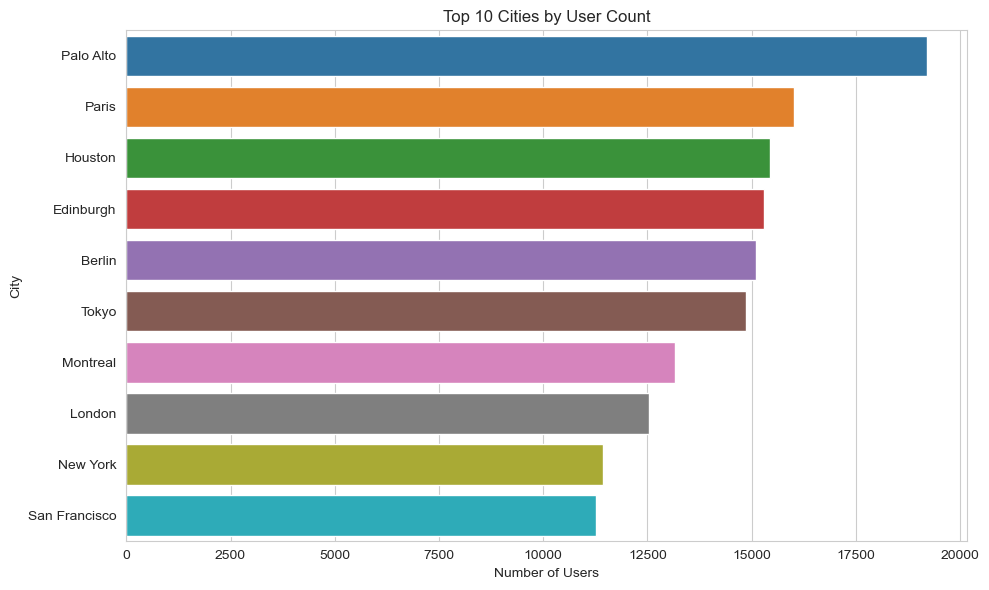

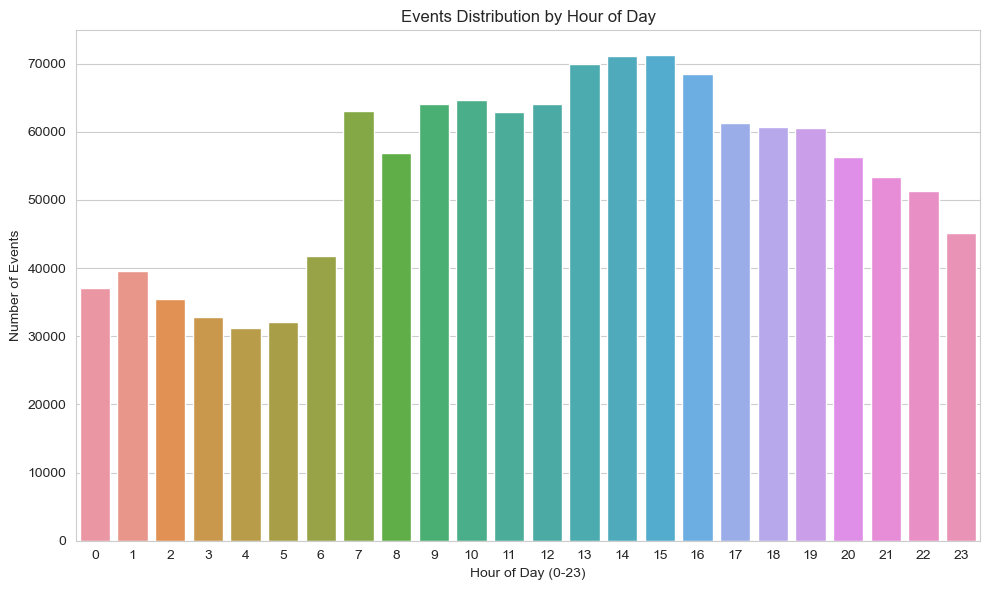


Event counts by hour of the day:
event_hour
0     37121
1     39586
2     35464
3     32763
4     31255
5     32077
6     41740
7     63000
8     56851
9     64111
10    64592
11    62849
12    64103
13    69941
14    71059
15    71302
16    68460
17    61251
18    60701
19    60547
20    56297
21    53304
22    51274
23    45128
Name: count, dtype: int64

Commit Count by User:
   user_id  commit_count
0      225          2408
1     1945          1217
2     2621           632
3     4196          1389
4     9582          1953


c:\Users\flipp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


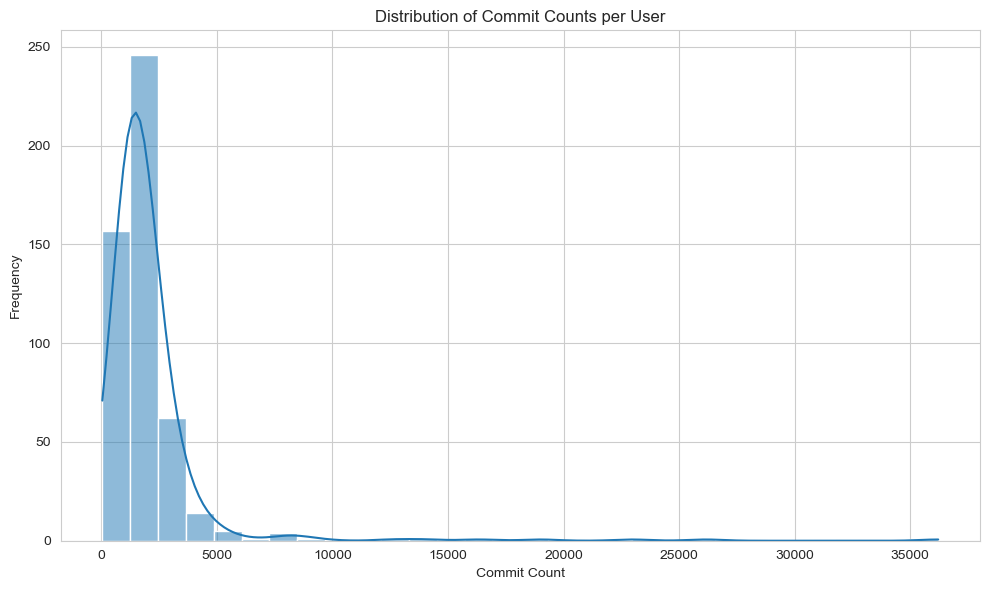

Number of High-Active Users: 50
Number of Low-Active Users: 49

Analysis completed. Check the generated plots and printed results.

Influence Stats:
 count    1.294776e+06
mean     5.440863e+02
std      2.578072e+02
min      3.385323e+02
25%      3.900486e+02
50%      4.552713e+02
75%      5.748544e+02
max      1.776967e+03
Name: total_influence, dtype: float64


c:\Users\flipp\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


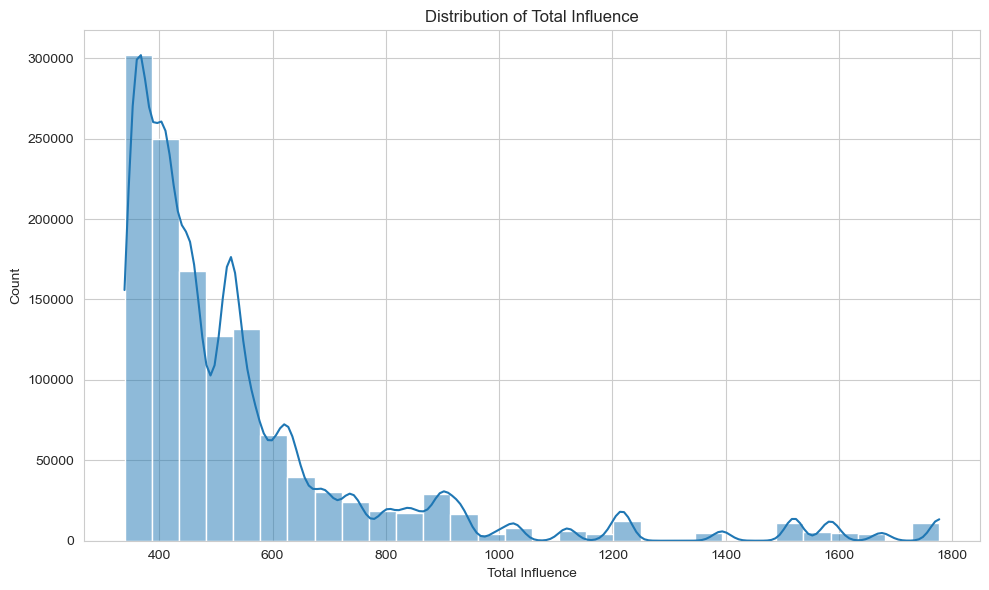

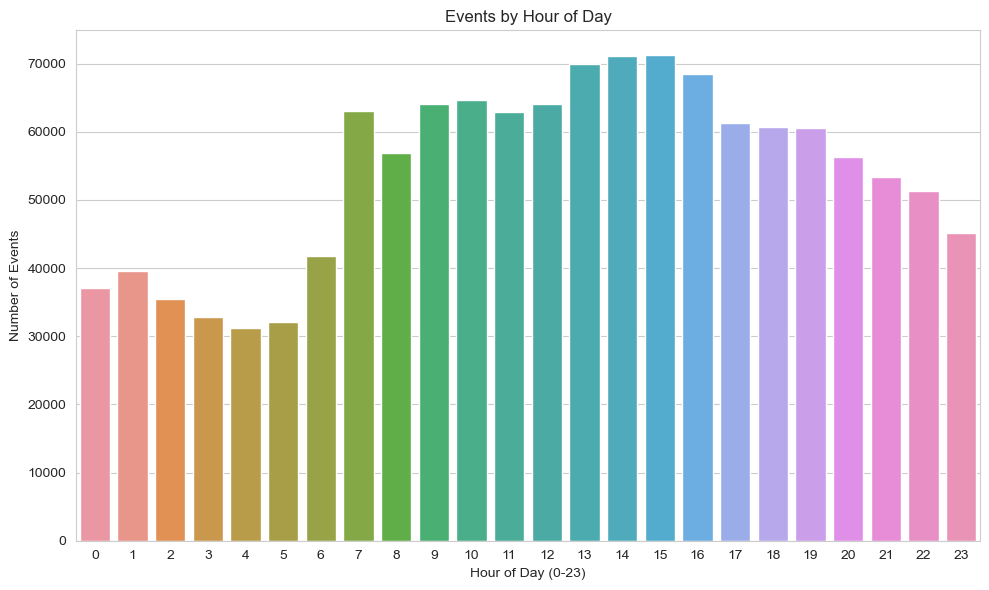


Top 10 Countries by Average Influence:
country
Netherlands       874.232403
South Korea       754.195618
Egypt             644.220337
Malaysia          597.661397
Switzerland       596.237744
United States     590.065086
Lebanon           572.721558
Colombia          560.299500
Taiwan            546.809248
United Kingdom    545.631840
Name: total_influence, dtype: float64


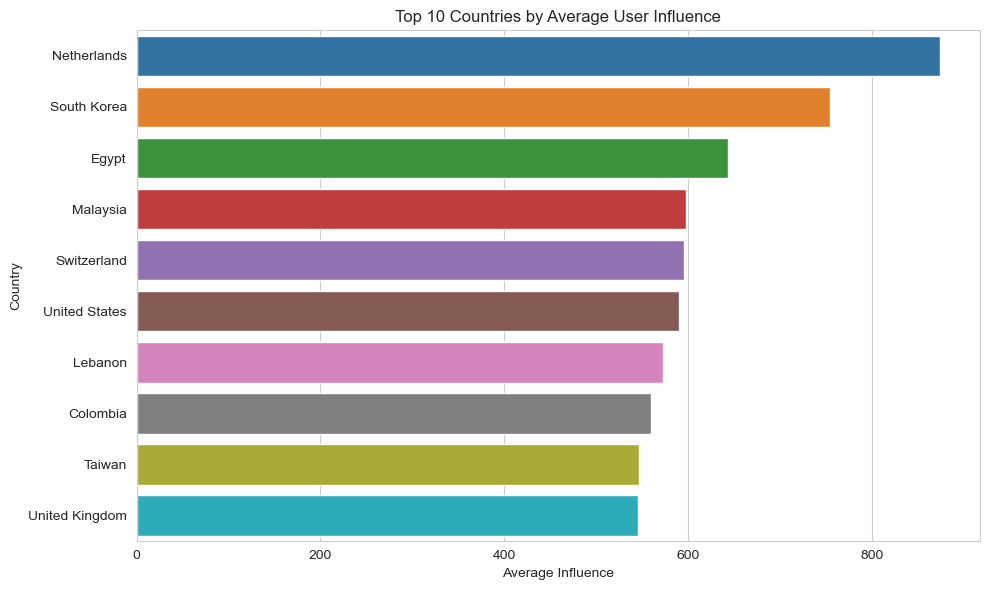


Analysis Completed. Check generated plots and analysis results.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# 设置绘图风格
sns.set_style("whitegrid")

# 读取数据
data_path = r"C:\Users\flipp\Desktop\Dase导论\users_combined_info_500.csv"  
df = pd.read_csv(data_path)

# 对location列进行拆分，尝试获得城市和州信息
if df['location'].notna().sum() > 0:
    location_split = df['location'].str.split(',', expand=True)
    if location_split.shape[1] >= 2:
        df['city'] = location_split[0].str.strip()
        df['state'] = location_split[1].str.strip()
    else:
        df['city'] = df['location']
        df['state'] = "Unknown"
else:
    df['city'] = "Unknown"
    df['state'] = "Unknown"

# 时间格式转换（如果需要对时间进行深入分析）
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

# 人口统计分析 1：国家分布
country_counts = df['country'].value_counts()
print("\nTop 10 Countries by User Count:")
print(country_counts.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.head(10).values, y=country_counts.head(10).index)
plt.title('Top 10 Countries by User Count')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig("top_countries.png", dpi=300)
plt.show()

# 人口统计分析 2：城市分布
df['location'] = df['location'].fillna('Unknown')

# 将 location 用逗号分割
df['location_parts'] = df['location'].str.split(',')

# 提取 city 信息：只有当分割后长度 >= 2 时，才认为有 "城市, 州(或其它)" 格式
df['city'] = df['location_parts'].apply(lambda x: x[0].strip() if len(x) >= 2 else np.nan)
df['state'] = df['location_parts'].apply(lambda x: x[1].strip() if len(x) >= 2 else np.nan)

# 过滤掉没有城市信息（即 city 为 NaN）的行
df_city = df.dropna(subset=['city'])

# 对 city 进行统计
city_counts = df_city['city'].value_counts()

print("\nTop 10 Cities by User Count:")
print(city_counts.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index)
plt.title('Top 10 Cities by User Count')
plt.xlabel('Number of Users')
plt.ylabel('City')
plt.tight_layout()
plt.savefig("top_cities.png", dpi=300)
plt.show()

# 人口统计分析 3：时区分布分析（基于event_time的小时分布）
df['event_hour'] = df['event_time'].dt.hour  # 提取小时（0-23）
hour_counts = df['event_hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Events Distribution by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.savefig("events_by_hour.png", dpi=300)
plt.show()

print("\nEvent counts by hour of the day:")
print(hour_counts)

# 提交频率分析：使用event_action进行统计
# 定义提交事件：event_action为 "created" 或 "added" 计为一次提交
commit_actions = ["created", "added"]
commit_df = df[df['event_action'].isin(commit_actions)]

# 按用户统计提交次数
commit_count_by_user = commit_df.groupby('user_id').size().reset_index(name='commit_count')

print("\nCommit Count by User:")
print(commit_count_by_user.head())

# 提交次数分布图
plt.figure(figsize=(10,6))
sns.histplot(commit_count_by_user['commit_count'], bins=30, kde=True)
plt.title('Distribution of Commit Counts per User')
plt.xlabel('Commit Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("commit_distribution.png", dpi=300)
plt.show()

# 高活跃用户(> 90th percentile)
high_threshold = commit_count_by_user['commit_count'].quantile(0.9)
high_active_users = commit_count_by_user[commit_count_by_user['commit_count'] > high_threshold]
print("Number of High-Active Users:", len(high_active_users))

# 低活跃用户(< 10th percentile)
low_threshold = commit_count_by_user['commit_count'].quantile(0.1)
low_active_users = commit_count_by_user[commit_count_by_user['commit_count'] < low_threshold]
print("Number of Low-Active Users:", len(low_active_users))

print("\nAnalysis completed. Check the generated plots and printed results.")

# 用户影响力分析
# total_influence字段描述用户影响力分布情况
influence_stats = df['total_influence'].describe()
print("\nInfluence Stats:\n", influence_stats)

plt.figure(figsize=(10,6))
sns.histplot(df['total_influence'], bins=30, kde=True)
plt.title('Distribution of Total Influence')
plt.xlabel('Total Influence')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("influence_distribution.png", dpi=300)
plt.show()

# 行为分析：事件随时间分布（如分析一天内的活跃度）
if df['event_time'].notna().sum() > 0:
    # 提取事件发生的小时
    df['event_hour'] = df['event_time'].dt.hour
    hour_counts = df['event_hour'].value_counts().sort_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x=hour_counts.index, y=hour_counts.values)
    plt.title('Events by Hour of Day')
    plt.xlabel('Hour of Day (0-23)')
    plt.ylabel('Number of Events')
    plt.tight_layout()
    plt.savefig("events_by_hour.png", dpi=300)
    plt.show()

# 用户影响力 vs 国家对比（平均影响力最高的国家）
avg_influence_by_country = df.groupby('country')['total_influence'].mean().sort_values(ascending=False)
print("\nTop 10 Countries by Average Influence:")
print(avg_influence_by_country.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=avg_influence_by_country.head(10).values, y=avg_influence_by_country.head(10).index)
plt.title('Top 10 Countries by Average User Influence')
plt.xlabel('Average Influence')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig("avg_influence_countries.png", dpi=300)
plt.show()

print("\nAnalysis Completed. Check generated plots and analysis results.")
